<a href="https://colab.research.google.com/github/wannasmile/colab_code_note/blob/main/AD00.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install --upgrade pyod

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!pip install combo

#from __future__ import division
#from __future__ import print_function

#import os
import sys
from time import time

import numpy as np
from numpy import percentile
import matplotlib.pyplot as plt
import matplotlib.font_manager

# Import all models
from pyod.models.abod import ABOD
from pyod.models.cblof import CBLOF
from pyod.models.iforest import IForest
from pyod.models.knn import KNN
from pyod.models.lof import LOF
from pyod.models.ocsvm import OCSVM
from pyod.models.pca import PCA


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
# Define the number of inliers and outliers
num_samples = 500
out_frac = 0.30
clusters_separation = [0]

# Compare given detectors under given settings
# Initialize the data
x, y = np.meshgrid(np.linspace(-7, 7, 100), np.linspace(-7, 7, 100))
num_inliers = int((1. - out_frac) * num_samples)
num_outliers = int(out_frac * num_samples)
ground_truth = np.zeros(num_samples, dtype=int)
ground_truth[-num_outliers:] = 1

In [4]:
# Show the statics of the data
print('No. of inliers: %i' % num_inliers)
print('No. of outliers: %i' % num_outliers)
print('Ground truth arrayy shape is {shape}. Outlier and inliers are represented by 1 and 0 respectively.\n'.format(shape=ground_truth.shape))
print(ground_truth)

No. of inliers: 350
No. of outliers: 150
Ground truth arrayy shape is (500,). Outlier and inliers are represented by 1 and 0 respectively.

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 

In [5]:
rs = np.random.RandomState(42)
# Define outlier detection tools to be compared
clf = {
    'Angle-based Outlier Detector (ABOD)':
        ABOD(contamination=out_frac),
    'Cluster-based Local Outlier Factor (CBLOF)':
        CBLOF(contamination=out_frac,
              check_estimator=False, random_state=rs),
    'Isolation Forest': IForest(contamination=out_frac,
                                random_state=rs),
    'K Nearest Neighbors (KNN)': KNN(
        contamination=out_frac),
    'Average KNN': KNN(method='mean',
                       contamination=out_frac),
    'Local Outlier Factor (LOF)':
        LOF(n_neighbors=35, contamination=out_frac),
    'One-class SVM (OCSVM)': OCSVM(contamination=out_frac),
    'Principal Component Analysis (PCA)': PCA(
        contamination=out_frac, random_state=rs),
    
}

In [6]:
# Show all detectors
for i, classifier in enumerate(clf.keys()):
    print('Model', i + 1, classifier)

Model 1 Angle-based Outlier Detector (ABOD)
Model 2 Cluster-based Local Outlier Factor (CBLOF)
Model 3 Isolation Forest
Model 4 K Nearest Neighbors (KNN)
Model 5 Average KNN
Model 6 Local Outlier Factor (LOF)
Model 7 One-class SVM (OCSVM)
Model 8 Principal Component Analysis (PCA)


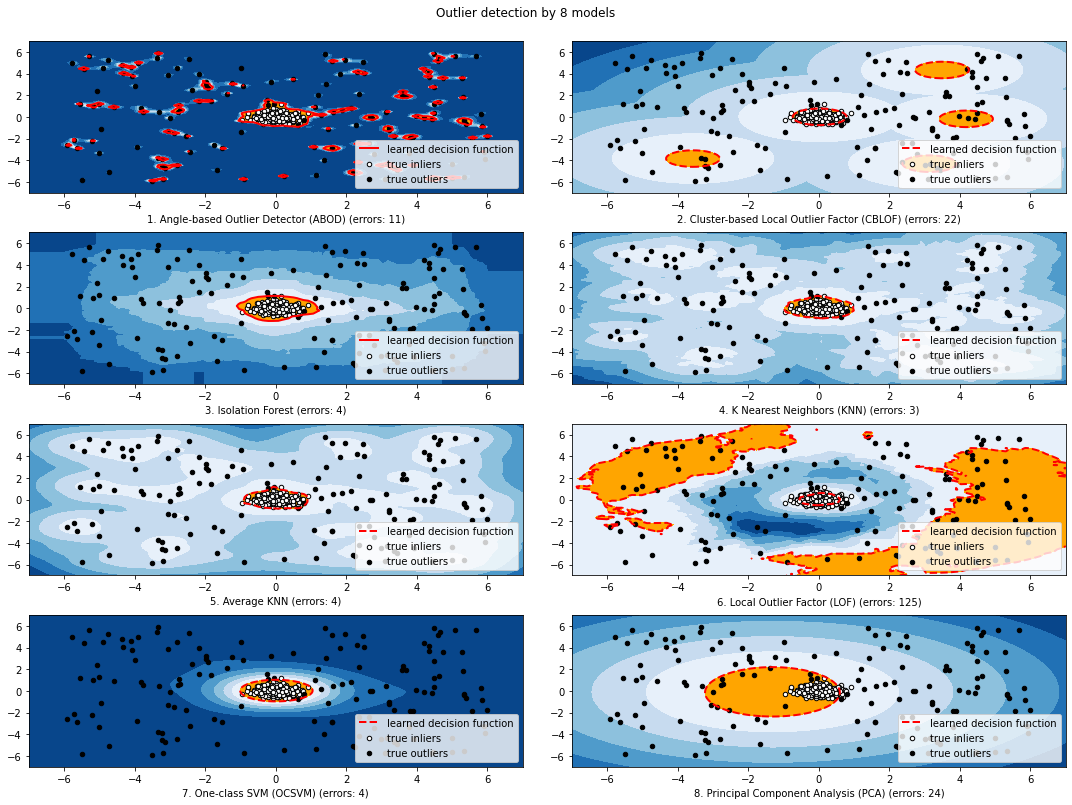

In [7]:
# Fit the models with the generated data and 
# compare model performances
for i, offset in enumerate(clusters_separation):
    np.random.seed(42)
    # Data generation
    X1 = 0.3 * np.random.randn(num_inliers // 2, 2) - offset
    X2 = 0.3 * np.random.randn(num_inliers // 2, 2) + offset
    X = np.r_[X1, X2]
    # Add outliers
    X = np.r_[X, np.random.uniform(low=-6, high=6, size=(num_outliers, 2))]

    # Fit the model
    plt.figure(figsize=(15, 12))
    for i, (classifier_name, classifier) in enumerate(clf.items()):
        #print(i + 1, 'fitting', classifier_name)
        # fit the data and tag outliers
        classifier.fit(X)
        scores_pred = classifier.decision_function(X) * -1
        y_pred = classifier.predict(X)
        threshold = percentile(scores_pred, 100 * out_frac)
        num_errors = (y_pred != ground_truth).sum()
        # plot the levels lines and the points

        Z = classifier.decision_function(np.c_[x.ravel(), y.ravel()]) * -1
        Z = Z.reshape(x.shape)
        subplot = plt.subplot(4, 2, i + 1)
        subplot.contourf(x, y, Z, levels=np.linspace(Z.min(), threshold, 7),
                         cmap=plt.cm.Blues_r)
        a = subplot.contour(x, y, Z, levels=[threshold],
                            linewidths=2, colors='red')
        subplot.contourf(x, y, Z, levels=[threshold, Z.max()],
                         colors='orange')
        b = subplot.scatter(X[:-num_outliers, 0], X[:-num_outliers, 1], c='white',
                            s=20, edgecolor='k')
        c = subplot.scatter(X[-num_outliers:, 0], X[-num_outliers:, 1], c='black',
                            s=20, edgecolor='k')
        subplot.axis('tight')
        subplot.legend(
            [a.collections[0], b, c],
            ['learned decision function', 'true inliers', 'true outliers'],
            prop=matplotlib.font_manager.FontProperties(size=10),
            loc='lower right')
        subplot.set_xlabel("%d. %s (errors: %d)" % (i + 1, classifier_name, num_errors))
        subplot.set_xlim((-7, 7))
        subplot.set_ylim((-7, 7))
    plt.subplots_adjust(0.04, 0.1, 1.00, 0.94, 0.1, 0.26)
    plt.suptitle("Outlier detection by 8 models")
plt.show()

In [8]:
#!pip freeze